In [1]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=a27fe29eac098cb29f49b3e7a95a11b4dd789ef5282a45177e423bd32ebdd77e
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from keras.api.models import Sequential
from keras.api.layers import Input, LSTM, Dense,Dropout

In [3]:
df = pd.read_csv("/content/historical_data.csv")




In [4]:
df.sample(5)

,Date,CompanyCode,LastTransactionPrice,MaxPrice,MinPrice,AveragePrice,PercentageChange,Quantity,TurnoverBest,TotalTurnover
10773,2017-02-13,MPT,27500.0,27500.0,27000.0,27394.74,-0.38,19,520500,520500
20398,2018-02-20,STIL,138.0,141.0,138.0,139.03,-4.10,1160,161280,161280
11810,2018-08-14,MTUR,4700.0,4700.0,4699.0,4699.59,0.00,17,79893,79893
17396,2024-07-16,STB,1568.0,1568.0,1568.0,1568.00,0.20,44,68992,68992
3584,2023-03-27,FUBT,2101.0,2101.0,2101.0,2101.00,16.72,38,79838,79838


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')


In [6]:
df

,Date,CompanyCode,LastTransactionPrice,MaxPrice,MinPrice,AveragePrice,PercentageChange,Quantity,TurnoverBest,TotalTurnover
25081,2014-12-29,TNB,5150.0,5150.0,5120.0,5122.50,0.11,60,307350,307350
11197,2014-12-29,MPT,22000.0,22200.0,22000.0,22088.89,0.40,72,1590400,1590400
16918,2014-12-29,SBT,1410.0,1410.0,1400.0,1407.27,0.52,139,195610,195610
8273,2014-12-29,KMB,1950.0,1951.0,1950.0,1950.18,0.78,550,1072600,1072600
14608,2014-12-29,REPL,57001.0,57001.0,57001.0,57001.00,0.00,3,171003,171003
...,...,...,...,...,...,...,...,...,...,...
17297,2024-12-26,STB,2790.0,2799.0,2650.0,2743.44,4.63,4978,13656850,13656850
13981,2024-12-26,REPL,16500.0,16500.0,16400.0,16483.49,-0.10,81,1335163,1335163
20844,2024-12-26,TEL,400.0,400.0,400.0,400.00,0.50,2423,969200,2969200
23273,2024-12-26,TNB,56001.0,56001.0,56000.0,56000.27,-0.88,15,840004,840004


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
620/620 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - loss: 0.0176
Epoch 2/50
620/620 ━━━━━━━━━━━━━━━━━━━━ 42s 36ms/step - loss: 0.0173
Epoch 3/50
620/620 ━━━━━━━━━━━━━━━━━━━━ 42s 39ms/step - loss: 0.0171
Epoch 4/50
620/620 ━━━━━━━━━━━━━━━━━━━━ 39s 36ms/step - loss: 0.0170
Epoch 5/50
620/620 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - loss: 0.0170
Epoch 6/50
620/620 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - loss: 0.0169
Epoch 7/50
620/620 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - loss: 0.0170
Epoch 8/50
620/620 ━━━━━━━━━━━━━━━━━━━━ 40s 36ms/step - loss: 0.0160
Epoch 9/50
620/620 ━━━━━━━━━━━━━━━━━━━━ 41s 36ms/step - loss: 0.0164
Epoch 10/50
620/620 ━━━━━━━━━━━━━━━━━━━━ 42s 38ms/step - loss: 0.0165
Epoch 11/50
620/620 ━━━━━━━━━━━━━━━━━━━━ 41s 38ms/step - loss: 0.0167
Epoch 12/50
620/620 ━━━━━━━━━━━━━━━━━━━━ 40s 37ms/step - loss: 0.0166
Epoch 13/50
620/620 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - loss: 0.0169
Epoch 14/50
620/620 ━━━━━━━━━━━━━━━━━━━━ 40s 36ms/step - loss: 0.0164
Epoch 15/50
620/620 ━━━━━━━━━

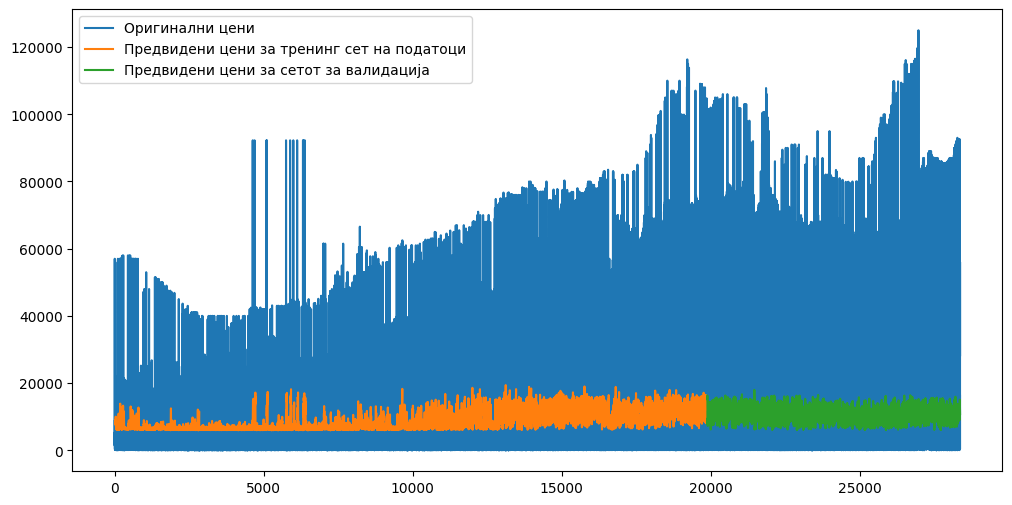

In [7]:


prices =df['LastTransactionPrice'].values.reshape(-1, 1)#избирање target колона

scaler = MinMaxScaler(feature_range=(0, 1))#скалирање
scaled_prices = scaler.fit_transform(prices)

train_size = int(len(scaled_prices) * 0.7)# поделба на мбожеството на train и test(валидација)
train, test = scaled_prices[:train_size], scaled_prices[train_size:]

def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 30  # поставуваме временскиот прозорец да биде околу 30 бидејќи тоа всушност претставува временска рамка од околу 1 месец и ке даде солидни резултати и за долгорочни и краткорочни трендови
X_train, y_train = create_dataset(train, time_steps)
X_test, y_test = create_dataset(test, time_steps)


X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1)) # форматирање на X за LSTM [samples, time steps, features]
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model = Sequential() #креирање на моделот
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))


model.compile(optimizer='adam', loss='mean_squared_error')


model.fit(X_train, y_train, epochs=50, batch_size=32) # тренирање на моделот

train_predict = model.predict(X_train) #генерирање на предвидувања
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)#инверзна трансформација на предвидувања
test_predict = scaler.inverse_transform(test_predict)

import math
from sklearn.metrics import mean_squared_error

train_mse =mean_squared_error(y_train, train_predict) #проценка на train и test множество со MSE
test_mse =mean_squared_error(y_test, test_predict)

train_rmse = math.sqrt(mean_squared_error(y_train, train_predict))#проценка на train и test множество со RMSE
test_rmse = math.sqrt(mean_squared_error(y_test, test_predict))


print(f'Train Mean Squared Error: {train_mse}')
print(f'Test  Mean Squared Error: {test_mse}')

print(f'Train Root Mean Squared Error: {train_rmse}')
print(f'Test  Root Mean Squared Error: {test_rmse}')


train_size = len(train_predict)
train_plot = np.empty_like(scaled_prices)
train_plot[:, :] = np.nan
train_plot[time_steps:train_size + time_steps, :] = train_predict

test_plot = np.empty_like(scaled_prices)
test_plot[:, :] = np.nan
test_plot[train_size + (time_steps * 2):, :] = test_predict

# визуелизација на податоците
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(scaled_prices), label='Оригинални цени')
plt.plot(train_plot, label='Предвидени цени за тренинг сет на податоци')
plt.plot(test_plot, label='Предвидени цени за сетот за валидација')
plt.legend()
plt.show()